In [11]:
import torch
from torchvision import datasets, transforms, models
from networks import MyNetwork, MyGaborNetwork
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [12]:
# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyNetwork().to(device)
model.load_state_dict(torch.load('mnist_model.pt', map_location=device))
model.eval()  # Set the model to evaluation mode

# Print the model structure
print(model)

MyNetwork(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.5, inplace=False)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=320, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)


Shape of conv1 weights: torch.Size([10, 1, 5, 5])
Filter 1 weights:
 tensor([[-0.1615, -0.1940,  0.0851,  0.2461,  0.1004],
        [ 0.0444,  0.0452,  0.1255,  0.2852, -0.0798],
        [-0.1791, -0.0502, -0.0021,  0.0326,  0.1058],
        [ 0.0107, -0.1143,  0.2445,  0.0946, -0.1474],
        [ 0.0124, -0.0615,  0.0978,  0.2576, -0.0460]])
Filter 2 weights:
 tensor([[-0.2947, -0.1293,  0.1076,  0.1832,  0.3762],
        [-0.0519, -0.0604,  0.0399,  0.0866,  0.3173],
        [-0.1088, -0.0119,  0.0521,  0.1819,  0.1358],
        [-0.0698, -0.2487, -0.0529, -0.0801,  0.1323],
        [-0.1260, -0.1522,  0.1167,  0.1354,  0.1255]])
Filter 3 weights:
 tensor([[ 0.3560,  0.1522,  0.3947,  0.0757,  0.2154],
        [ 0.1505,  0.0511,  0.2187,  0.2124,  0.1813],
        [-0.0090, -0.1793, -0.1879,  0.1130,  0.1893],
        [-0.3675, -0.2555, -0.2135, -0.4292, -0.3218],
        [-0.2433, -0.3040, -0.4452, -0.2128, -0.4318]])
Filter 4 weights:
 tensor([[ 0.0493, -0.1700, -0.0071, -0.2506, -

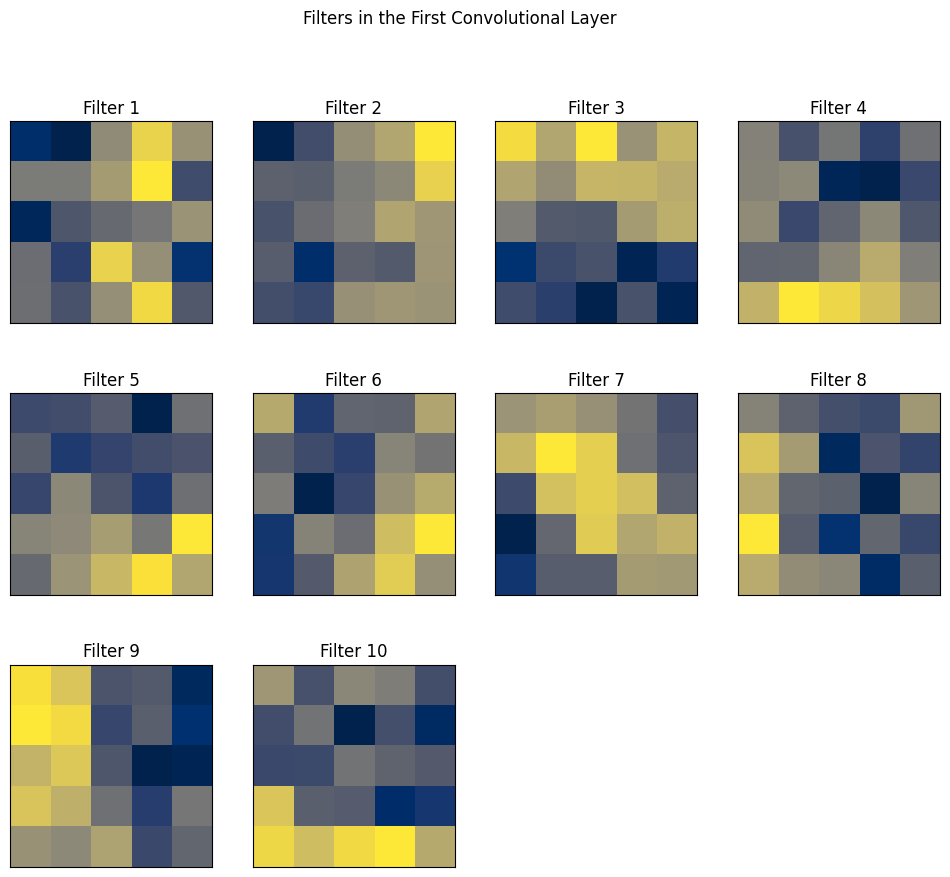

In [4]:
# Access the weights of the first layer
conv1_weights = model.block_1[0].weight.detach()
print(f"Shape of conv1 weights: {conv1_weights.shape}")

for i in range(10):
    pre= "Filter " + str(i+1) + " weights:\n"
    print(pre,conv1_weights[i,0])

plt.figure(figsize=(12, 10))
for i in range(10):
    filter_weights = conv1_weights[i, 0].cpu().numpy()
    plt.subplot(3, 4, i+1)
    plt.imshow(filter_weights, cmap='cividis')
    plt.title("Filter " + str(i+1))
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Filters in the First Convolutional Layer')
plt.show()

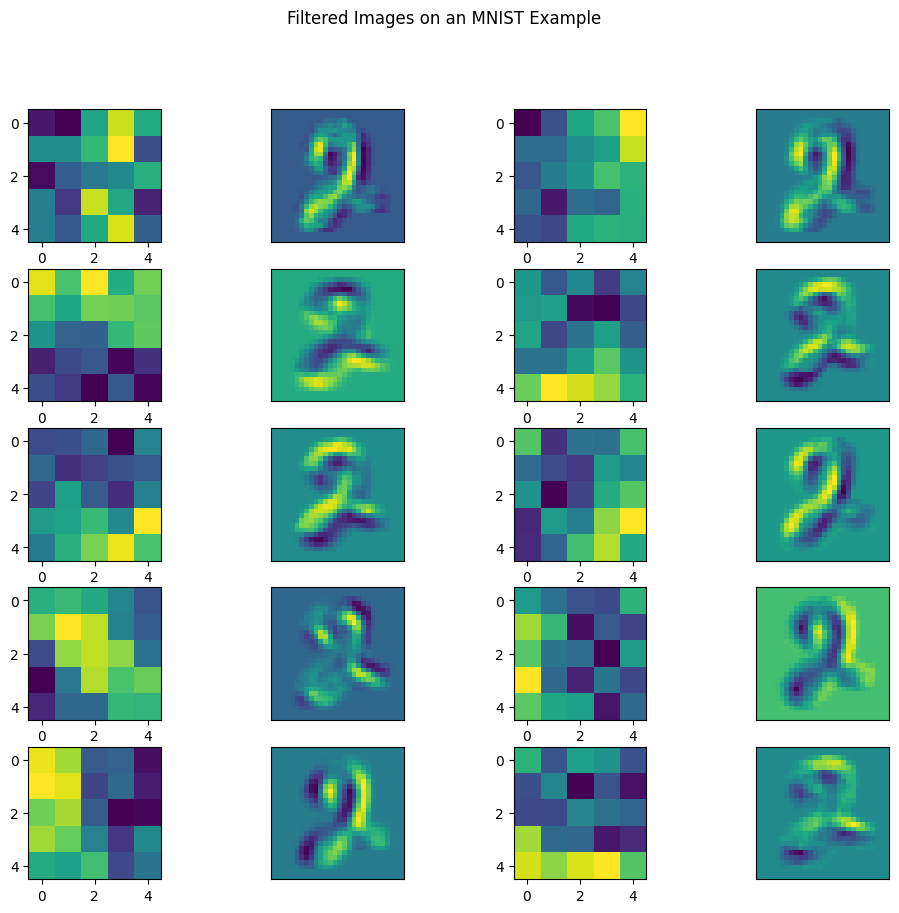

In [5]:
# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Use the first image from the batch
input_image = images[0].squeeze().numpy()

# Assuming conv1_weights is already obtained from your model as shown previously
plt.figure(figsize=(12, 10))
for i in range(10):
    filter_weights = conv1_weights[i, 0].cpu().numpy()
    filtered_image = cv2.filter2D(input_image, -1, filter_weights)
    plt.subplot(5, 4, 2*i+1)
    plt.imshow(filter_weights, cmap='viridis')
    plt.subplot(5, 4, 2*i+2)
    plt.imshow(filtered_image, cmap='viridis')
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Filtered Images on an MNIST Example')
plt.show()


MyGaborNetwork(
  (block_1): GaborLayer()
  (block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.5, inplace=False)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2880, out_features=50, bias=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=10, bias=True)
  )
)
Shape of Gabor filters: torch.Size([10, 1, 5, 5])
Filter 1 weights:
 tensor([[0.1654, 0.6301, 0.8825, 0.6301, 0.1654],
        [0.1817, 0.6920, 0.9692, 0.6920, 0.1817],
        [0.1874, 0.7140, 1.0000, 0.7140, 0.1874],
        [0.1817, 0.6920, 0.9692, 0.6920, 0.1817],
        [0.1654, 0.6301, 0.8825, 0.6301, 0.1654]])
Filter 2 weights:
 tensor([[-0.0054,  0.3749,  0.7881,  0.8280,  0.4616],
        [ 0.0976,  0.5688,  0.9425,  0.8313,  0.3637],
        [ 0.2306,  0.7361,  1.0000,  0.7361,  0.2306],
        [ 0

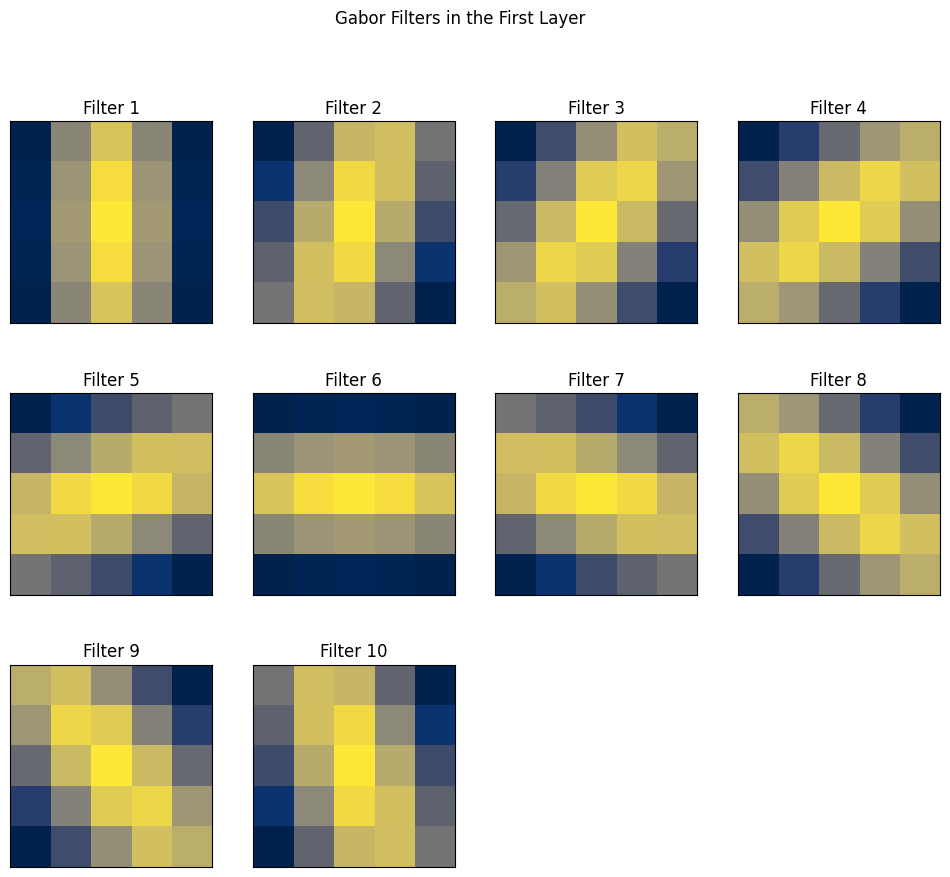

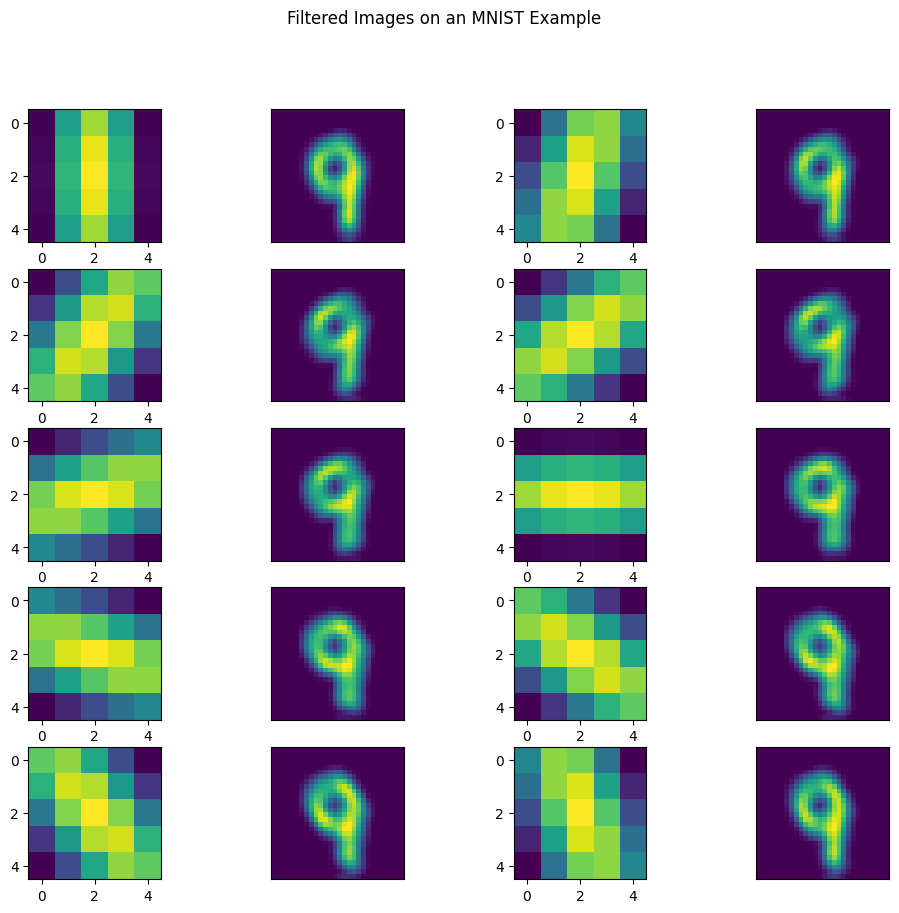

In [10]:
#Extension 1: Gabor Filter MNIST Network
# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyGaborNetwork().to(device)
model.load_state_dict(torch.load('mnist_gabor_model.pt', map_location=device))
model.eval()  # Set the model to evaluation mode

# Print the model structure
print(model)

gabor_filters = model.block_1.filters.detach()  # Access the Gabor filters
print(f"Shape of Gabor filters: {gabor_filters.shape}")

for i in range(10):
    pre= "Filter " + str(i+1) + " weights:\n"
    print(pre,gabor_filters[i,0])

# Visualizing the first 10 Gabor filters
plt.figure(figsize=(12, 10))
for i in range(10):
    # Assuming gabor_filters shape is [out_channels, in_channels, H, W]
    # And since you're interested in visualizing individual filters,
    # we select the first filter of each set (if in_channels > 1, adjust accordingly)
    filter_weights = gabor_filters[i, 0].cpu().numpy()  # Adjust indexing if necessary
    plt.subplot(3, 4, i+1)
    plt.imshow(filter_weights, cmap='viridis')
    plt.title(f"Filter {i+1}")
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Gabor Filters in the First Layer')
plt.show()

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Use the first image from the batch
input_image = images[0].squeeze().numpy()

# Assuming conv1_weights is already obtained from your model as shown previously
plt.figure(figsize=(12, 10))
for i in range(10):
    filter_weights = gabor_filters[i, 0].cpu().numpy()
    filtered_image = cv2.filter2D(input_image, -1, filter_weights)
    plt.subplot(5, 4, 2*i+1)
    plt.imshow(filter_weights, cmap='viridis')
    plt.subplot(5, 4, 2*i+2)
    plt.imshow(filtered_image, cmap='viridis')
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Filtered Images on an MNIST Example')
plt.show()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

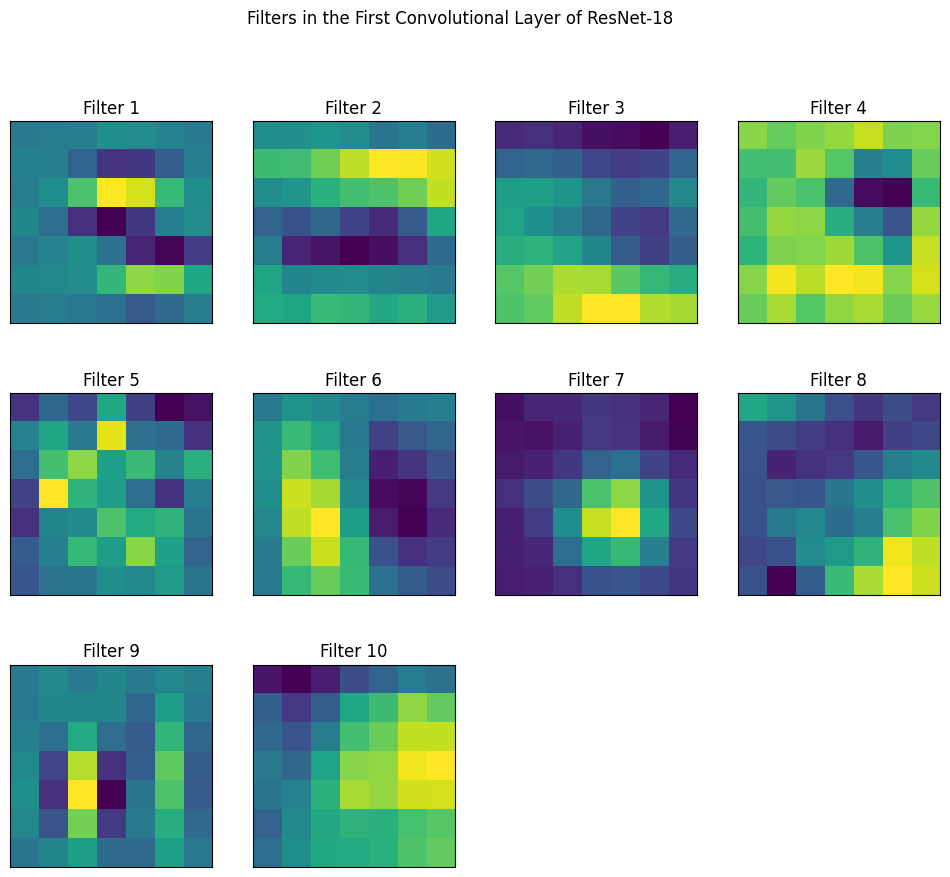

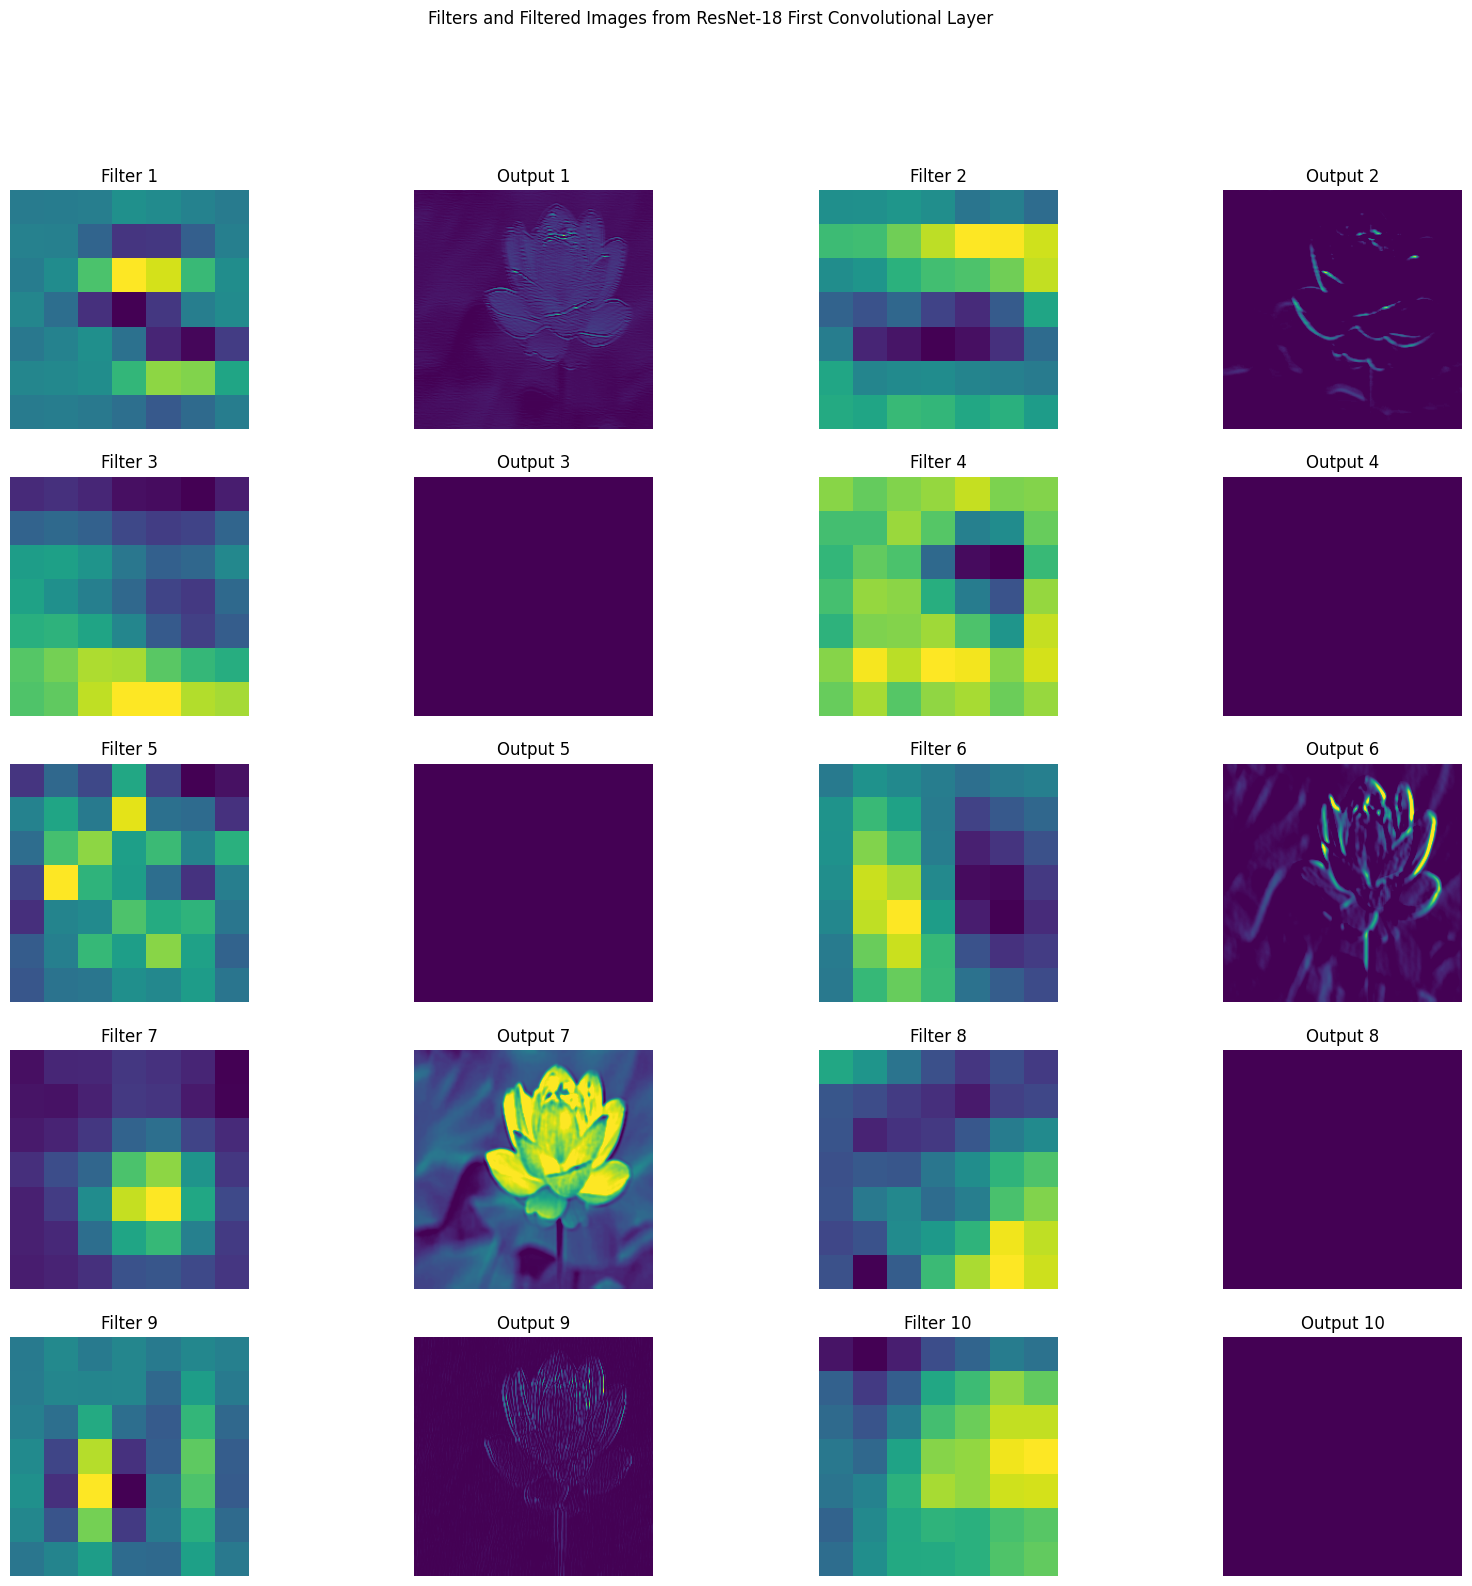

In [23]:
#Extension 2: Resnet18 Network
model = models.resnet18(pretrained=True).to('cpu')
model.eval()  # Set the model to evaluation mode

# Print the model structure (optional, to understand where the conv layers are)
print(model)

conv1_weights = model.conv1.weight.detach().cpu().numpy()
print(f"Resnet18 Layer 1 size: {conv1_weights.shape}")

# Visualize the first 10 filters of the first convolutional layer
plt.figure(figsize=(12, 10))
for i in range(10):
    filter_weights = conv1_weights[i, 0]  # Access the first channel for visualization
    plt.subplot(3, 4, i+1)
    plt.imshow(filter_weights, cmap='viridis')
    plt.title(f"Filter {i+1}")
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Filters in the First Convolutional Layer of ResNet-18')
plt.show()

image_path = 'example_image.jpg'
img = cv2.imread(image_path)  # Read the image
img = cv2.resize(img, (224, 224))  # Resize to fit model expected input
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Create a figure to display the filters and their corresponding outputs
plt.figure(figsize=(20, 18))

for i in range(10):
    # We're visualizing the first channel of each filter for simplicity.
    filter_weights = conv1_weights[i, 0]

    # Apply filter to the grayscale image
    filtered_img = cv2.filter2D(gray_img, -1, filter_weights)

    # Display the filter
    plt.subplot(5, 4, 2*i + 1)
    plt.imshow(filter_weights, cmap='viridis')
    plt.title(f"Filter {i+1}")
    plt.axis('off')

    # Display the filtered image
    plt.subplot(5, 4, 2*i + 2)
    plt.imshow(filtered_img, cmap='viridis')
    plt.title(f"Output {i+1}")
    plt.axis('off')

plt.suptitle('Filters and Filtered Images from ResNet-18 First Convolutional Layer')
plt.show()
